#### Logistic regression using the custum function and sklearn
- Data preparation
- Data preprocessing
- Data visulization
- Model
- Accuracy

In [1]:
## Creating the custum dataset

import numpy as np

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

dist1 = np.random.multivariate_normal(mean_01,cov_01,500)
dist2 = np.random.multivariate_normal(mean_02,cov_02,500)

print("The shape of the dist1 is {}".format(dist1.shape))
print("The shape of the dist2 is {}".format(dist2.shape))

The shape of the dist1 is (500, 2)
The shape of the dist2 is (500, 2)


In [2]:
data = np.zeros((1000,3))
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,2:] = 1
np.random.shuffle(data)
X = data[:,:2]
Y = data[:,2:]

print("The shape of the X is {}".format(X.shape))
print("The shape of the Y is {}".format(Y.shape))

The shape of the X is (1000, 2)
The shape of the Y is (1000, 1)


In [3]:
### Divide into train and test
from sklearn.model_selection import train_test_split

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.2)
print("The size if X_Train is {}".format(X_Train.shape))
print("The size if X_Test is {}".format(X_Test.shape))
print("The size if Y_Train is {}".format(Y_Train.shape))
print("The size if Y_Test is {}".format(Y_Test.shape))

The size if X_Train is (800, 2)
The size if X_Test is (200, 2)
The size if Y_Train is (800, 1)
The size if Y_Test is (200, 1)


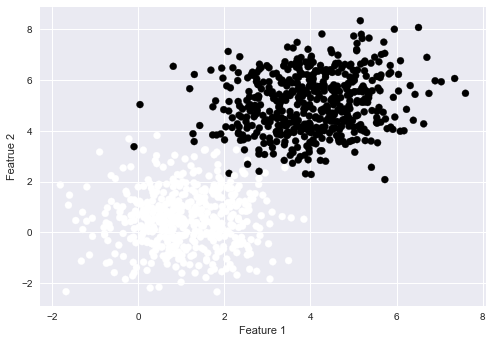

In [4]:
### Data visulization

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],label="features",c=Y[:,0])
plt.xlabel("Feature 1")
plt.ylabel("Featrue 2")
plt.show()

In [89]:
"""Functions by Deepanshu garg"""
def hypothesis(x,w,b):
    """Function return a single value called prediction by making a call to sigmoid function"""
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    """Function convert the values in range {0,1}"""
    return 1.0/(1 + np.exp(-1.0*z))

def errorCal(X,w,b,Y):
    """Function returns the error value"""
    m = X.shape[0]
    error = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i],w,b)
        error += (Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx))
    
    return -error/m

def predict(x,w,b):
    """Function return the prediction"""
    hx = hypothesis(x,w,b)
    if hx>=0.5:
        return 1
    else:
        return -1
    
def accuracy(X,w,b,Y):
    """Function returns the accuracy"""
    y_pred = []
    for i in range(Y.shape[0]):
        p = predict(X[i],w,b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    
    return  float((y_pred==Y).sum())/Y.shape[0]

def get_grads(y_true,x,w,b):
    """Function returns the grad or sum in the dradient ascent"""
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (hx - y_true[i])*x[i]
        grad_b +=  (hx - y_true[i])
    grad_w
    grad_b
    
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate=0.1):
    """Function returns the gradient descent for one iteration"""
    err = errorCal(x,w,b,y_true)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    
    return err,w,b

In [90]:
loss = []
acc = []

W = 2*np.random.random((X_Train.shape[1],))
b = 5*np.random.random()
for i in range(100):
    l,W,b = grad_descent(X_Train,Y_Train,W,b,learning_rate=0.01)
    acc.append(accuracy(X_Test,W,b,Y_Test))
    loss.append(l)

c:\users\deepa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2
c:\users\deepa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


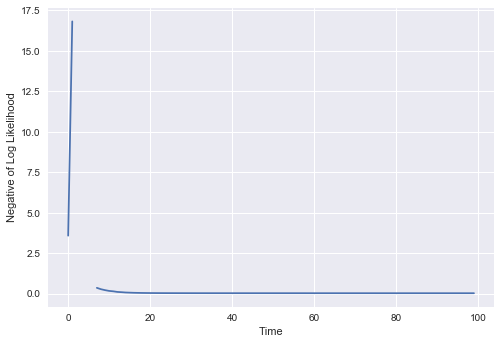

In [91]:
### Visulizing the error graph
import matplotlib.pyplot as plt

plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

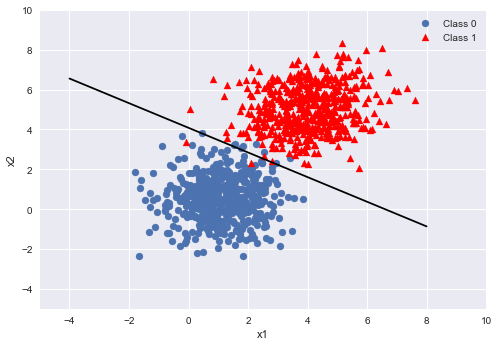

In [92]:
plt.figure(0)

plt.scatter(dist1[:,0],dist1[:,1],label='Class 0')
plt.scatter(dist2[:,0],dist2[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [43]:
### Using the sklearn

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_Train,Y_Train)
lr.score(X_Test,Y_Test)

c:\users\deepa\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.985